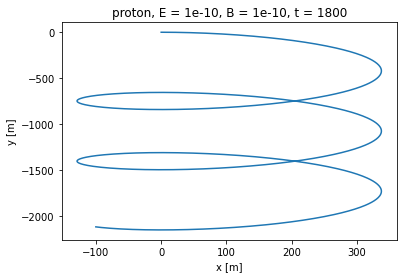

In [37]:
from scipy import integrate as itg
import numpy as np
import matplotlib.pyplot as plt

def derivs(y,t,E,B,q,m):
    d = np.zeros(np.shape(y))
    d[0:3] = y[3:6]
    d[3:6] = q/m*(E + np.cross(y[3:6],B))
    return d

y0 = np.array([0.0,0.0,0.0,2.0,0.0,0.0])

def derivs_mirror(y,t,E,B,q,m):
    B_mirror = B*np.abs(y[0:3])**2/np.abs(y0[0:3])**2
    d = np.zeros(np.shape(y))
    d[0:3] = y[3:6]
    d[3:6] = q/m*(E + np.cross(y[3:6],B_mirror))
    return d

mproton = 1.6726e-27
melectron = 9.109e-31 

E = np.array([1.0e-10,0.0,0.0])
B = np.array([0.0,0.0,1.0e-10])
q = 1.602e-19
m = mproton

ti = 0.0
tf = 1.8e3
num_points = 1000
t = np.linspace(ti,tf,num_points)

res = itg.odeint(derivs,y0,t,args=(E,B,q,m))

x = [ i[0] for i in res ]
y = [ i[1] for i in res ]
z = [ i[2] for i in res ]

plt.plot(x,y)

plt.title("proton, E = 1e-10, B = 1e-10, t = 1800")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show(block=True)


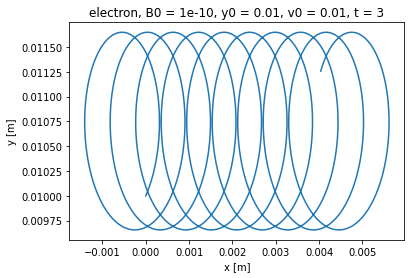

In [84]:
y0 = 1e-2*np.array([0.0,1.0,0.0,1.41,1.41,0.0])

def derivs(y,t,E,B,q,m):
    B_mirror = B*y[1]**2/y0[1]**2
    d = np.zeros(np.shape(y))
    d[0:3] = y[3:6]
    d[3:6] = q/m*(E + np.cross(y[3:6],B_mirror))
    return d

mproton = 1.6726e-27
melectron = 9.109e-31 

E = np.array([0,0.0,0.0])
B = np.array([0.0,0.0,1.0e-10])
q = -1.602e-19
m = melectron

ti = 0.0
tf = 3.0
num_points = 1000
t = np.linspace(ti,tf,num_points)

res = itg.odeint(derivs,y0,t,args=(E,B,q,m))

x = [ i[0] for i in res ]
y = [ i[1] for i in res ]
z = [ i[2] for i in res ]

plt.plot(x,y)

plt.title("electron, B0 = 1e-10, y0 = 0.01, v0 = 0.01, t = 3")
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.show(block=True)

0.9957440716963813


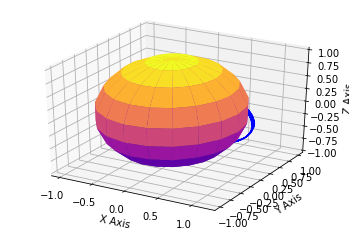

In [148]:
from scipy import integrate as itg
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def derivs(y,t,E,q,m,magM):
    d = np.zeros(np.shape(y))
    d[0:3] = y[3:6]
    d[3:6] = q/m*(E + np.cross(y[3:6],bfield(y[0:3],magM)))
    return d

def bfield(r,M):
    mu0 = 1.257e-6
    res = mu0/(4*np.pi)*((3*r*(M.dot(r)))/np.sqrt(r.dot(r))**5 - M/np.sqrt(r.dot(r))**3)
    return res
    #This function calculates the magnetic field from 
    #position vector and magnetic dipole moment
    #Good luck!

E = np.array([0.0,0.0,0.0])
magM = np.array([0.0,0.0,8.10e22])
q = 1.60217662e-19
m = 1.6726219e-27 
c = 3e8
re = 6.38e6
Ek_ev = 5e7


#Velocity
vr = c/np.sqrt(1.0+m*c**2/Ek_ev/np.abs(q))
vp = 0.0
vt = np.pi/4
v = np.array([vr*np.sin(vt)*np.cos(vp),vr*np.sin(vt)*np.sin(vp),vr*np.cos(vt)])
#Position
rr = 1.18*re
rp = 0.0
rt = np.pi/2
r = np.array([rr*np.sin(rt)*np.cos(rp),rr*np.sin(rt)*np.sin(rp),rr*np.cos(rt)])
#State vector
y0 = np.array([r[0],r[1],r[2],v[0],v[1],v[2]])

ti = 0.0
tf = 1.0
num_points = 10000
t = np.linspace(ti,tf,num_points)

res = itg.odeint(derivs,y0,t,args=(E,q,m,magM))

dists = np.sqrt(res[:,0]**2 + res[:,1]**2 + res[:,2]**2)
print(np.min(dists)/re)

x = [ i[0]/re for i in res ]
y = [ i[1]/re for i in res ]
z = [ i[2]/re for i in res ]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
xs = np.cos(u)*np.sin(v)
ys = np.sin(u)*np.sin(v)
zs = np.cos(v)
ax.plot_surface(xs, ys, zs, cmap=cm.plasma)
#Note: the colormap "plasma" is the only acceptable colormap when doing plasma physics!
#...although "jet" can be justified in some cases.

ax.plot(x, y, z, lw=1.0, c="b")
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
#ax.set_xlim((-3.0,3.0))
#ax.set_ylim((-3.0,3.0))
#ax.set_zlim((-3.0,3.0))

plt.show(block=True)


[1.59500000e+07 0.00000000e+00 9.76655822e-10]
[0.00000000e+00            nan 3.47792634e+50]


<ipython-input-96-773c8882a1db>:4: RuntimeWarning: invalid value encountered in true_divide
  print(((3*r*(M*r))/np.abs(r)**5 + M/np.abs(r)**3))


0.625
